In [1]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/KGW852/class/main/data/iris_data.csv')

iris.head()

,class,sepal_length,sepal_width,petal_length,petal_width
0,Iris-setosa,5.1,3.5,1.4,0.2
1,Iris-setosa,4.9,3.0,1.4,0.2
2,Iris-setosa,4.7,3.2,1.3,0.2
3,Iris-setosa,4.6,3.1,1.5,0.2
4,Iris-setosa,5.0,3.6,1.4,0.2


In [2]:
# 인풋과 아웃풋 데이터 만들기
iris_input = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
iris_target = iris['class'].to_numpy()

In [3]:
# 훈련세트와 테스트세트로 분리하기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, random_state=13)

In [4]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
# SGDClassifier 학습
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=13)

In [6]:
sc.fit(train_scaled, train_target)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=13)

In [7]:
# 학습결과 확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8392857142857143
0.7368421052631579


In [8]:
# 1epoch씩 추가 재학습
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=13)

In [9]:
# 학습결과 확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8928571428571429
0.8947368421052632


In [10]:
# 에포크마다 훈련 & 테스트세트 점수 기록
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=13)
train_score = []
test_score = []
classes = np.unique(train_target)

for i in range(0, 200):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

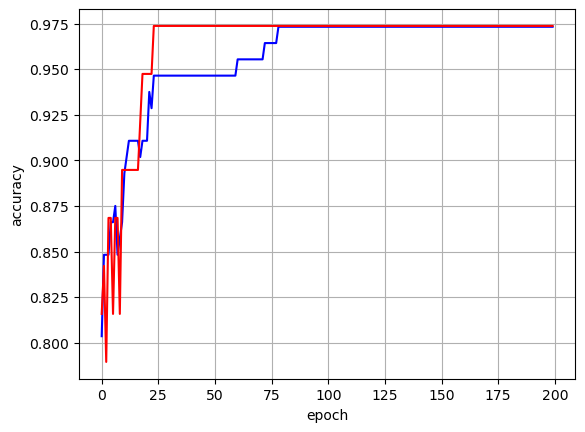

In [11]:
# Epoch 횟수별 점수 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, 'b')
plt.plot(test_score, 'r')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [12]:
# Epoch 100회, 모델 재생성
sc = SGDClassifier(loss='log_loss', max_iter=125, tol=None, random_state=13)

In [13]:
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=125, random_state=13, tol=None)

In [14]:
# 학습결과 확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9732142857142857
0.9736842105263158


### 선형회귀 모델 SGD를 이용한 최적화

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


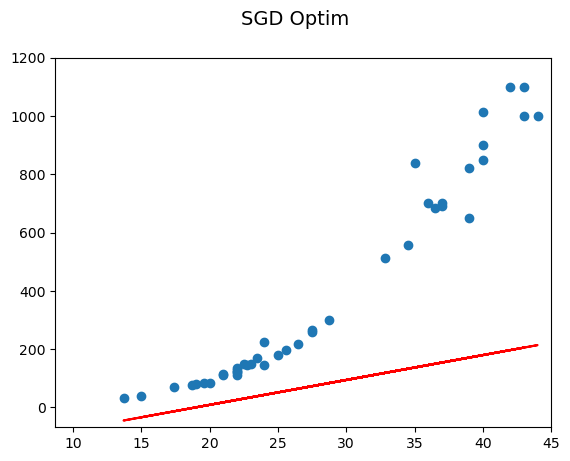

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun  1 18:57:24 2024

@author: KGW
"""

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 농어(perch) 데이터 입력
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련/테스트 데이터 분리 (기존 코드와 동일)
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 전처리
scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)

# SGD 모델 초기화 및 초기 학습 (스케일링된 데이터 사용)
sgd = SGDRegressor(max_iter=1, eta0=0.01, random_state=42)
sgd.fit(train_input_scaled, train_target) 

# 그래프 설정
fig, ax = plt.subplots()
x_min, x_max = train_input.min(), train_input.max() # 스케일링 되지 않은 값 사용
y_min, y_max = train_target.min(), train_target.max()
ax.set_xlim([x_min -5, x_max + 1]) 
ax.set_ylim([y_min - 100, y_max + 100])
ax.scatter(train_input, train_target)
line, = ax.plot(train_input, sgd.predict(scaler.transform(train_input)), 'r-')  # 회귀선 초기화

# 텍스트 객체 생성
plt.suptitle('SGD Optim', fontsize=14)
text = ax.text(0.05, 0.85, '', transform=ax.transAxes)  # 왼쪽 상단에 텍스트 위치 설정

# 애니메이션 프레임 생성
def update(frame):
    sgd.partial_fit(train_input_scaled, train_target)
    line.set_ydata(sgd.predict(scaler.transform(train_input)))  # 회귀선 업데이트
    # 스케일링된 모델의 기울기와 절편을 원본에 대한 값으로 변환
    m = sgd.coef_[0] / scaler.scale_[0]
    c = sgd.intercept_[0] - m * scaler.mean_[0]

    text.set_text(f'Epoch {frame+1}\nm: {m:.2f}, c: {c:.2f}')

# 애니메이션 생성 및 저장
ani = FuncAnimation(fig, update, frames=100, interval=50, repeat=True)
plt.show()